<a href="https://colab.research.google.com/github/Camilohoyos99/AA_DATOS/blob/main/LabValidation_AnalisisAvanzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

vamos atomar una base de datos para predecir el precio de las casa de boston  a partir de las siguientes caracteristicas.


1. **CRIM**: Tasa de criminalidad per cápita por ciudad.
2. **ZN**: Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
3. **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
4. **CHAS**: Variable ficticia Charles River.
    CHAS = 1 if traza limita con el río else 0
5. **NOX**: Concentración de óxidos nítricos (partes por 10 millones).
6. **RM**: Número promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuesto a la propiedad de valor total por $10,000.
11. **PTRATIO**: Proporción alumno-profesor por ciudad.
12.  **B**:   1000*(Bk - 0.63)**2 donde Bk es la proporción de personas de origen afroamericano por ciudad.
13. **LSTAT**: Porcentaje de población de menor estatus.

objetivo predecir el valór de la vivienda medio

##Advertencia Ética

Es importante mencionar que al cargar el conjunto de datos, aparece una advertencia debido a los problemas éticos ***Aca debemos reflexionar un poco respecto a la ciencia de datos y la etica**. Sin embargo, para fines educativos y de demostración, se procedió con el análisis **sin tener en cuenta B**.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

# import el dataset
boston_data = load_boston()

print(boston_data.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Debido a los problemas éticos asociados con el conjunto de datos de viviendas de Boston, muchas bibliotecas y plataformas están evitando o desaconsejando su uso. Para fines academicos  y reflexivos, aún es posible obtener el conjunto de datos desde otras fuentes en línea.

In [10]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [27]:
df = pd.DataFrame(data)
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df.columns = feature_names
df.reset_index(inplace=True)
df['price'] = target
df = df.drop(columns=['B'])

In [28]:
df.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## VISUALIZACIÓN
 Se grafica las relaciones entre cada característica y la variable objetivo "MEDV" (valor mediano de las viviendas) del conjunto de datos de viviendas de Boston. Estas gráficas te ayudarán a visualizar cómo cada característica se relaciona con el valor mediano de las viviendas.

Es importante mencionar que al cargar el conjunto de datos, aparece una advertencia debido a los problemas éticos mencionados anteriormente. Sin embargo, para fines educativos y de demostración, procederemos con el análisis.

Con base en las gráficas, puedes observar ciertas tendencias y relaciones entre las características y el valor mediano de las viviendas. Por ejemplo, "RM" (número promedio de habitaciones por vivienda) parece tener una relación lineal positiva con "MEDV", mientras que "LSTAT" (porcentaje de población de menor estatus) parece tener una relación lineal negativa.

KeyError: 0

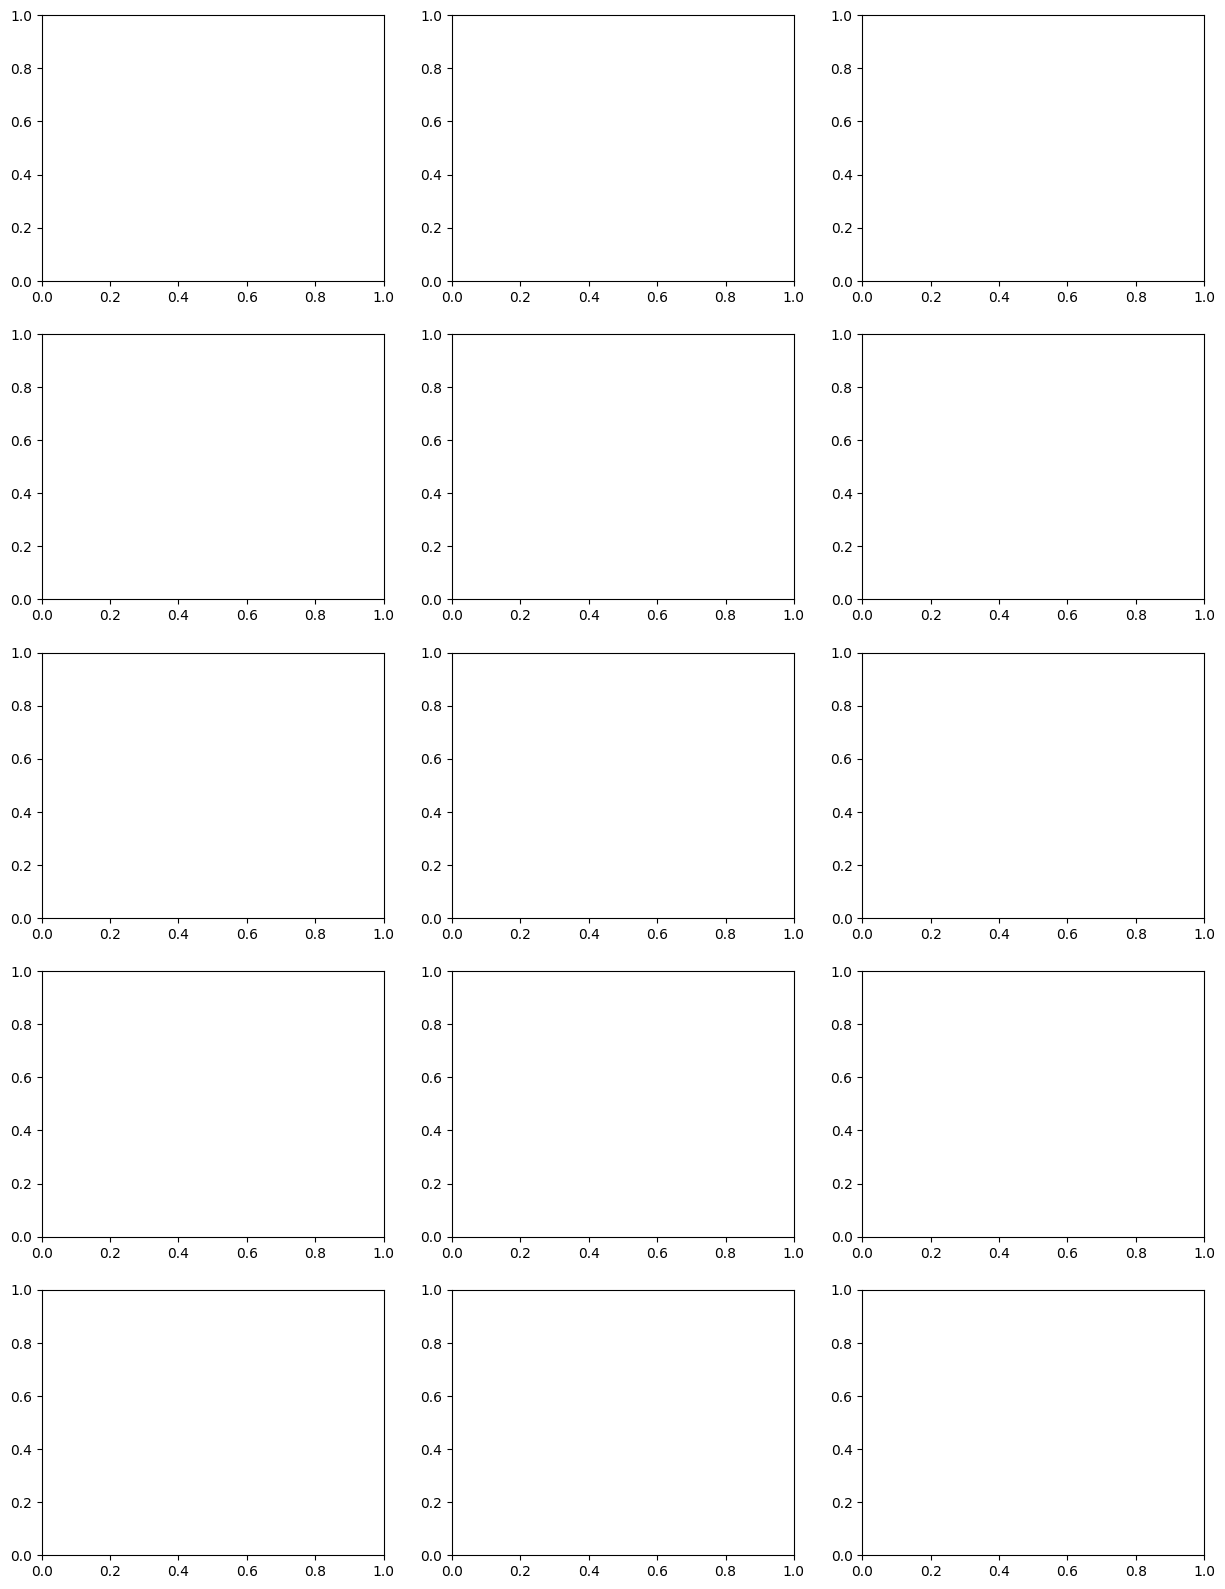

In [29]:
# Convertir los datos y el objetivo a un DataFrame
# Nombres de las características para referencia
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT"]

# Graficar cada característica contra la etiqueta
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.axis('off')  # Desactivar ejes adicionales
        continue
    ax.scatter(df[i], df['price'], edgecolor='k', s=20)
    ax.set_ylabel("MEDV (Valor mediano de vivienda)")
    ax.set_xlabel(feature_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()


In [5]:
df.columns = feature_names

ValueError: Length mismatch: Expected axis has 14 elements, new values have 13 elements

## Validación Cruzada

Realiza las técnicas de validación Genera un conjunto de modelos de regresión Lineal  y polinomio y entrega el mejor modelo usando validación k-fold  y LOOCV

Qué características seleccionas para realizar la predicción Para la medida de calidad usa RMSE

Puedes usar  los datos dados en el colab del 1 laboratorio o usar las librerias  sklearn

## Boostrap

Eres un analista especializado en el mercado inmobiliario. Con el conjunto de datos proporcionado anteriormente, tu tarea es predecir el valor de las viviendas utilizando solamente dos características. Para validar la precisión y robustez de tu modelo, emplearás la técnica de bootstrap. Para llevar a cabo este procedimiento en Python, debes hacer uso de la función resample que se encuentra en el módulo scikit-learn.utils.

pseudo codigo
1 Selecciona una muestra con reemplazo
    X_sample, y_sample = resample(X_selected, y, n_samples=bootstrap_size)
    
2 Entrena el modelo
3 Hace predicciones sobre todo el conjunto de datos
4 Calcula el error cuadrático medio y guardalo
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

4 Analizar y visualizar la distribución de mse_values para obtener insights sobre la variabilidad y precisión del modelo.